In [1]:
import MySQLdb
conn = MySQLdb.connect(host='127.0.0.1', port=3306, user='root', passwd='123', db='edm', charset='utf8')
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pandas.io.sql as sql

## 试卷-技能点数

In [5]:
data = sql.read_sql("select S.skill_point_id, S.paper_id from self_test_logs S, valid_students V where S.type=2 and S.user_id=V.uid", conn)

In [6]:
data.head()

,skill_point_id,paper_id
0,171,240
1,16019,240
2,169,240
3,16020,240
4,13543,240


In [44]:
data.shape

(8092, 2)

In [53]:
data = data.drop_duplicates()  

In [54]:
data2.shape

(8048, 2)

In [55]:
grouped = data['skill_point_id'].groupby(data['paper_id'])
data2 = grouped.count()

In [8]:
import matplotlib.pyplot as plt

Text(0,0.5,'number of skill_points covered')

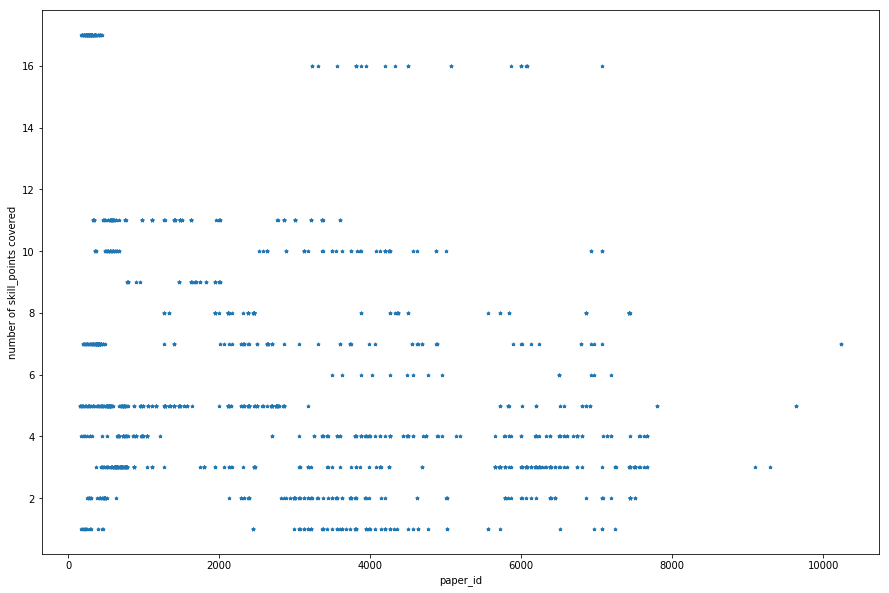

In [57]:
%matplotlib inline

plt.figure(figsize=(15,10))
plt.scatter(data2.index, data2.loc[data2.index], s=10, marker='*')
plt.xlabel("paper_id")
plt.ylabel("number of skill_points covered")

In [58]:
data2 = data2.sort_values(ascending=False)
data2

paper_id
358     17
417     17
298     17
296     17
294     17
292     17
291     17
389     17
399     17
283     17
282     17
281     17
276     17
400     17
269     17
267     17
265     17
406     17
259     17
340     17
257     17
299     17
373     17
300     17
314     17
344     17
345     17
347     17
320     17
319     17
        ..
463      1
3495     1
444      1
3432     1
6507     1
388      1
2996     1
3560     1
289      1
285      1
3678     1
3803     1
3799     1
244      1
4769     1
2447     1
2448     1
2452     1
3736     1
3629     1
3600     1
3179     1
5010     1
7245     1
5015     1
5560     1
3627     1
5718     1
3174     1
3983     1
Name: skill_point_id, Length: 1326, dtype: int64

In [68]:
data3 = data2.value_counts()
data3 = data3.sort_index()

In [73]:
data3

1      76
2     122
3     218
4     159
5     244
6      15
7     130
8      65
9      29
10     76
11     94
16     23
17     75
Name: skill_point_id, dtype: int64

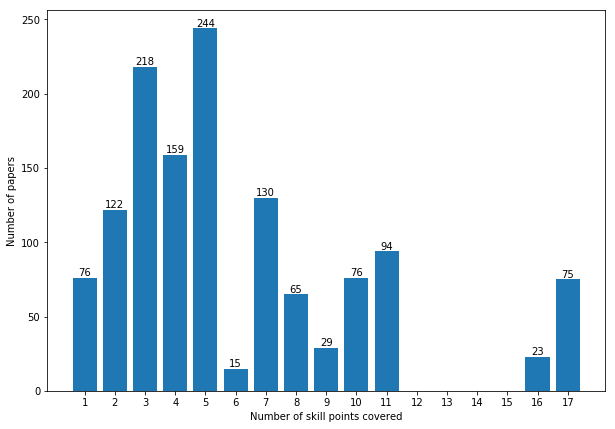

In [78]:
#data3.plot(kind='bar')
plt.figure(figsize=(10,7))
x = data3.index
y = data3
plt.bar(x,y)
my_x_ticks = np.arange(1, 18, 1)
plt.xticks(my_x_ticks)
plt.xlabel("Number of skill points covered")
plt.ylabel("Number of papers")
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va='bottom')

## 岗位标签-试卷数

In [2]:
data4 = sql.read_sql("select distinct tag_name, tag_target_id, S.id from job_tag_skill_relations J, skill_point S where tag_target_id like 'Md%' and S.mid = J.tag_target_id  order by tag_target_id", conn)

In [3]:
data4.head()

,tag_name,tag_target_id,id
0,html,Md01,NewH1
1,html,Md01,NewH6
2,html,Md01,H18
3,html,Md01,H2
4,html,Md01,H7


In [4]:
data5 = data4['id'].groupby(data4['tag_name']).count()

In [5]:
data5 = data5.sort_values(ascending=False)
data5

tag_name
php           145
javascript     49
css            37
html5          36
html           32
vuejs          27
bootstrap      27
angularjs      26
移动端            21
css3           20
版本控制           18
jquery          1
Name: id, dtype: int64

In [6]:
c = np.arange(12)
c

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

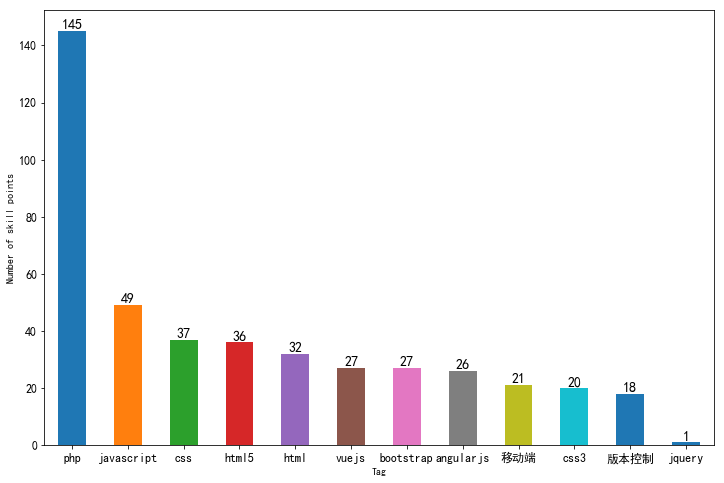

In [34]:
plt.figure(figsize=(12,8))
plt.rcParams['font.sans-serif']=['SimHei']
data5.plot(kind='bar', fontsize=12)
x = data5.index
y = data5
c = np.arange(12)
plt.xticks(rotation=0)
plt.xlabel("Tag")
plt.ylabel("Number of skill points")
for a,b in zip(c,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va='bottom',fontsize=14)

## 岗位标签-试卷数

In [20]:
data6 = sql.read_sql("SELECT distinct S.id as block_id, name as block_name, mid, tag_name, Q.paper_id  FROM (select tag_name, tag_target_id from job_tag_skill_relations) J, (select mid, name, id from skill_block)S, self_test_history Q where S.mid=J.tag_target_id and Q.block_id=S.id and Q.type=2" , conn)

In [21]:
data6.head()

,block_id,block_name,mid,tag_name,paper_id
0,4,超链接,Md01,html,10
1,1,网页基础,Md01,html,10
2,2,HTML基本语法,Md01,html,10
3,3,图像标签,Md01,html,10
4,11,CSS基本选择器,Md02,css,11


In [22]:
data7 = data6.iloc[:, -2:]
data7.shape

(2692, 2)

In [23]:
data7.head()

,tag_name,paper_id
0,html,10
1,html,10
2,html,10
3,html,10
4,css,11


In [24]:
data7 = data7.drop_duplicates()  

In [25]:
data7.tail()

,tag_name,paper_id
2687,vuejs,9294
2688,vuejs,9645
2689,vuejs,9646
2690,vuejs,10232
2691,vuejs,10233


In [26]:
data8 = data7['paper_id'].groupby(data7['tag_name']).count()

In [27]:
data8 #版本控制 php missing!

tag_name
angularjs      54
bootstrap      77
css           392
css3          116
html          250
html5         128
javascript    293
jquery        265
vuejs         104
移动端            64
Name: paper_id, dtype: int64

In [28]:
data8 = data8.sort_values(ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

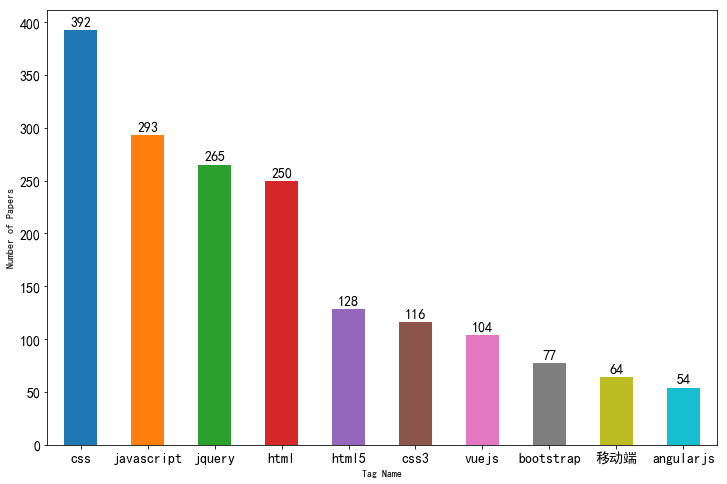

In [36]:
plt.figure(figsize=(12,8))
data8.plot(kind='bar',fontsize=14)
x = np.arange(10)
y = data8
for a,b in zip(x,y):
    plt.text(a, b+2, '%.0f' % b, ha='center', va='bottom',fontsize=14)
plt.xlabel("Tag Name")
plt.ylabel("Number of Papers")
plt.xticks(rotation=0)

## 时间序列展示（做试卷时间戳）

In [202]:
data9 = sql.read_sql("SELECT r_start, U.uid, V.uname, tid FROM user_events U, valid_students V where type=4 and U.uid=V.uid", conn)

In [203]:
data9.head()

,r_start,uid,uname,tid
0,2017-06-24 16:39:28,10326738,卞亮亮,exam-course-yk-Android-zjhtmls0101
1,2017-06-24 20:21:55,10326738,卞亮亮,exam-course-yk-Android-wywy1s0101
2,2017-06-26 09:10:55,10326738,卞亮亮,exam-course-yk-Android-wywy2s0101
3,2017-06-26 13:28:59,10326738,卞亮亮,exam-course-yk-Android-wywy3s0101
4,2017-06-27 09:32:33,10326738,卞亮亮,exam-course-yk-html5-bghbds0101


In [204]:
data9.shape

(1137, 4)

In [205]:
data9.drop_duplicates().shape

(1137, 4)

In [223]:
data9['new'] = 0
data9.head()

,r_start,uid,uname,tid,new
0,2017-06-24 16:39:28,10326738,卞亮亮,exam-course-yk-Android-zjhtmls0101,0
1,2017-06-24 20:21:55,10326738,卞亮亮,exam-course-yk-Android-wywy1s0101,0
2,2017-06-26 09:10:55,10326738,卞亮亮,exam-course-yk-Android-wywy2s0101,0
3,2017-06-26 13:28:59,10326738,卞亮亮,exam-course-yk-Android-wywy3s0101,0
4,2017-06-27 09:32:33,10326738,卞亮亮,exam-course-yk-html5-bghbds0101,0


In [4]:
import matplotlib.dates as mdate

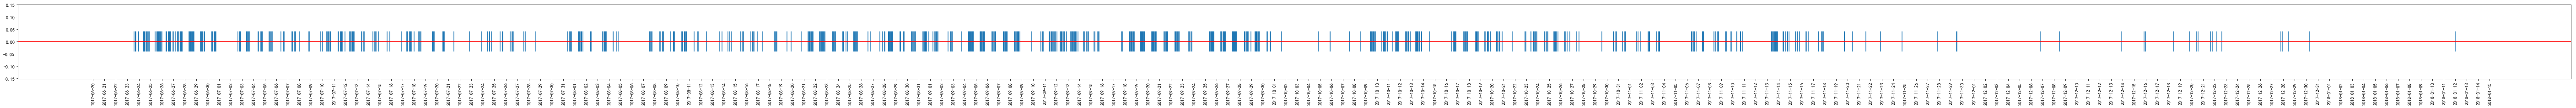

In [199]:
#plt.figure(figsize=(100,3))

fig1 = plt.figure(figsize=(100,3))
ax1 = fig1.add_subplot(1,1,1)
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))#设置时间标签显示格式
plt.xticks(pd.date_range('2017-06-20','2018-01-15'),rotation=90)
plt.rcParams['axes.unicode_minus']=False
plt.scatter(data9['r_start'].values, data9['new'].values, marker='|', s=2000)
plt.axhline(y=0,color='red')

### 单独挑出一个学员做分析

In [227]:
data10 = sql.read_sql("SELECT r_start, U.uid, V.uname, tid FROM user_events U, valid_students V where type=4 and U.uid=V.uid and V.uname like'郭忠'", conn)

In [228]:
data10['new'] = 0
data10.head()

,r_start,uid,uname,tid,new
0,2017-06-24 10:49:21,10704173,郭忠,exam-course-yk-Android-zjhtmls0101,0
1,2017-06-26 00:13:21,10704173,郭忠,exam-course-yk-Android-wywy1s0101,0
2,2017-06-27 08:24:54,10704173,郭忠,exam-course-yk-Android-wywy2s0101,0
3,2017-06-28 10:09:39,10704173,郭忠,exam-course-yk-Android-wywy3s0101,0
4,2017-06-29 10:57:36,10704173,郭忠,exam-course-yk-html5-bghbds0101,0


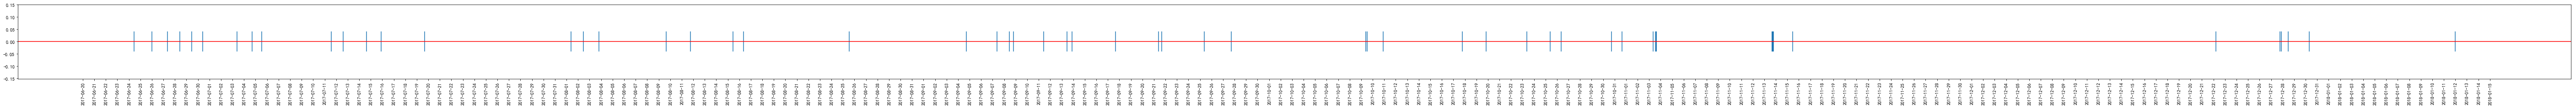

In [229]:
fig2 = plt.figure(figsize=(100,3))
ax2 = fig2.add_subplot(1,1,1)
ax2.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))#设置时间标签显示格式
plt.xticks(pd.date_range('2017-06-20','2018-01-15'),rotation=90)
plt.rcParams['axes.unicode_minus']=False
plt.scatter(data10['r_start'].values, data10['new'].values, marker='|', s=2000)
plt.axhline(y=0,color='red')

## 试卷重复率

In [235]:
data11 = sql.read_sql("select uname, tid from timeline", conn)

In [236]:
data11.shape

(1137, 2)

In [238]:
data11[data11.duplicated()]

,uname,tid
279,郭鑫鑫,exam-course-yk-js-typescriptgsys0101
280,郭鑫鑫,exam-course-yk-web-sylwzxmkfs0102
319,张帅,exam-course-yk-js-typescriptgsys0101
383,吕佳莹,exam-course-yk-web-fws0101
384,吕佳莹,exam-course-yk-web-lyzj0101


### 以上：用user_events表分析重复率效果不佳

### 改用self_test_logs数据

In [241]:
data12 = sql.read_sql("SELECT V.uid,V.uname, S.skill_point_id, S.skill_point_name, S.paper_id FROM `self_test_logs`S, valid_students V where V.uid=S.user_id and type=2 ", conn)

In [242]:
data12.head()

,uid,uname,skill_point_id,skill_point_name,paper_id
0,10326738,卞亮亮,171,了解网页制作标准（W3C标准）,240
1,10326738,卞亮亮,16019,掌握相对路径和绝对路径的区别,240
2,10326738,卞亮亮,169,了解网页构成的基本信息,240
3,10326738,卞亮亮,16020,掌握功能性链接在网页中的应用,240
4,10326738,卞亮亮,13543,了解html标记特点及发展历史,240


In [243]:
data12.shape

(8092, 5)

In [271]:
data13 = data12['paper_id'].groupby([data12['uid'],data12['skill_point_id']]).count()

In [272]:
data13.head()

uid       skill_point_id
10326738  10660             4
          10661             4
          10662             4
          10669             5
          10670             5
Name: paper_id, dtype: int64

In [273]:
type(data13)

pandas.core.series.Series

In [275]:
data14 = data13.reset_index()

In [276]:
data14.head()

,uid,skill_point_id,paper_id
0,10326738,10660,4
1,10326738,10661,4
2,10326738,10662,4
3,10326738,10669,5
4,10326738,10670,5


In [280]:
sum14 = data14['paper_id'].groupby(data14['skill_point_id']).sum()
sum14.head()

skill_point_id
10660    81
10661    81
10662    81
10669    37
10670    37
Name: paper_id, dtype: int64

In [281]:
count14 = data14['paper_id'].groupby(data14['skill_point_id']).count()
count14.head()

skill_point_id
10660    14
10661    14
10662    14
10669    14
10670    14
Name: paper_id, dtype: int64

In [283]:
repeat = (sum14 - count14)/sum14

In [288]:
repeat = repeat.sort_values(ascending=False)

In [290]:
repeat.shape

(226,)

In [292]:
repeat.head()

skill_point_id
16127    0.86
10711    0.86
16158    0.86
10712    0.86
15592    0.86
Name: paper_id, dtype: float64

In [297]:
data15 = repeat.value_counts()
data15.head()

0.588235    17
0.434783    16
0.000000    13
0.611111    12
0.166667    11
Name: paper_id, dtype: int64

### 在时间轴的基础上绘制试卷重复率（不会做

### 先对repeat进行润色

In [299]:
data16 = repeat.reset_index()
data16.head()

,skill_point_id,paper_id
0,16127,0.86
1,10711,0.86
2,16158,0.86
3,10712,0.86
4,15592,0.86


In [310]:
data16.shape

(226, 2)

In [300]:
data17 = sql.read_sql("select ID, NAME, IMPORTANCE from skill_tree", conn)

In [304]:
data17.columns=['skill_point_id', 'skill_point', 'importance']
data17.head()

,skill_point_id,skill_point,importance
0,10203,Web前端,None
1,10204,HTML,None
2,10205,网页基础,None
3,11810,Dreamweaver基本操作,X
4,11811,HTML语言简介,X


In [311]:
data17.shape

(830, 3)

In [312]:
t = pd.merge(data16,data17,how='outer',on='skill_point_id')
t.shape #一个都没配上

(1056, 4)

In [324]:
data16.head()

,skill_point_id,paper_id
0,16127,0.86
1,10711,0.86
2,16158,0.86
3,10712,0.86
4,15592,0.86


In [330]:
data16['skill_point_id']=data16['skill_point_id'].astype('int')

In [334]:
data18 = pd.merge(data16,data17,on='skill_point_id')
data18.columns=['skill_point_id', 'repeating_rate','skill_point', 'importance']
data18.head()

,skill_point_id,repeating_rate,skill_point,importance
0,16127,0.86,节点属性操作（设置和删除）,X
1,10711,0.86,节点遍历（子元素、同辈元素、前辈元素）,X
2,16158,0.86,节点操作（查找、创建、插入、删除、替换和复制）,X
3,10712,0.86,DOM操作中常用API的用法（综合应用）,X
4,15592,0.86,jQuery遍历节点的方法,X


In [349]:
data18.shape[0]

226

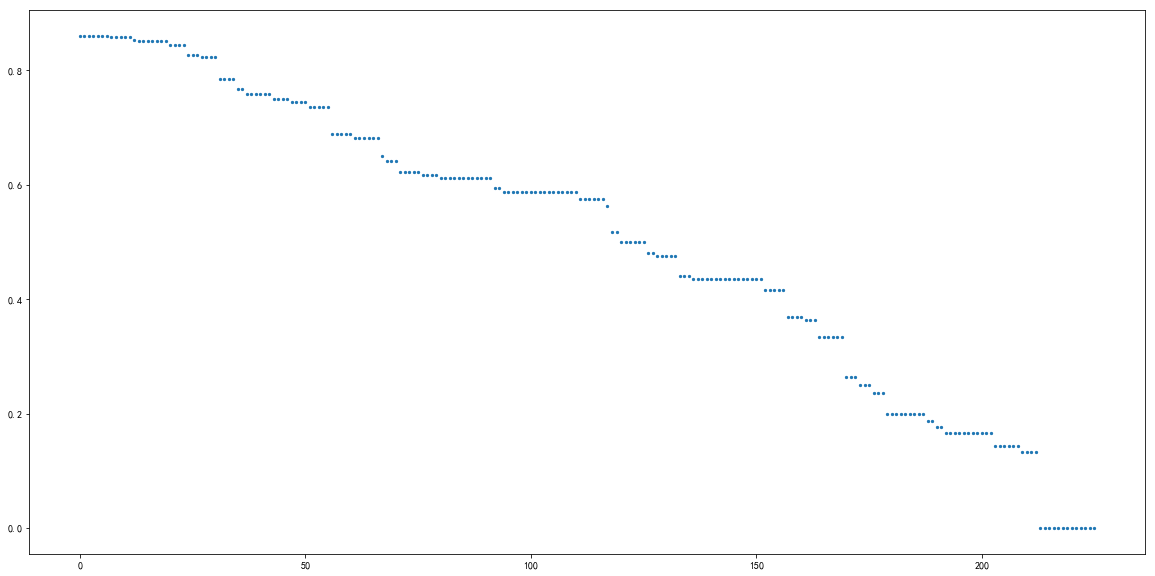

In [361]:
plt.figure(figsize=(20,10))
plt.scatter(np.arange(data18.shape[0]),data18['repeating_rate'], s=5)

- 试着加入时间序列（以skill_tree为学习顺序参考）

In [363]:
skill_points = sql.read_sql("select code, id as skill_point_id from skill_tree order by code", conn)

In [364]:
skill_points.head()

,code,skill_point_id
0,10000-10203,10203
1,10000-10203-10204,10204
2,10000-10203-10204-10205,10205
3,10000-10203-10204-10205-11810,11810
4,10000-10203-10204-10205-11811,11811


In [367]:
data20 = pd.merge(data18, skill_points, on='skill_point_id')

In [368]:
data20.sort_values(by=['code'])

,skill_point_id,repeating_rate,skill_point,importance,code
11,13542,0.858586,了解html基本概念,X,10000-10203-10204-10205-13542
8,13543,0.858586,了解html标记特点及发展历史,X,10000-10203-10204-10205-13543
10,169,0.858586,了解网页构成的基本信息,X,10000-10203-10204-10205-169
7,170,0.858586,了解网页的基本结构,X,10000-10203-10204-10205-170
9,171,0.858586,了解网页制作标准（W3C标准）,Y,10000-10203-10204-10205-171
19,16006,0.852273,掌握标题标签的使用,X,10000-10203-10204-10209-16006
16,16007,0.852273,掌握段落标签的使用,X,10000-10203-10204-10209-16007
17,16008,0.852273,掌握换行标签的使用,X,10000-10203-10204-10209-16008
15,16009,0.852273,掌握水平线标签的使用,X,10000-10203-10204-10209-16009
18,16011,0.852273,掌握HTML注释和特殊字符的使用,X,10000-10203-10204-10209-16011


In [356]:
data18['repeating_rate'].describe()

count    226.000000
mean       0.503079
std        0.251954
min        0.000000
25%        0.333333
50%        0.575758
75%        0.688889
max        0.860000
Name: repeating_rate, dtype: float64

In [357]:
x['repeating_rate'].describe()

count    168.000000
mean       0.534049
std        0.242514
min        0.000000
25%        0.404605
50%        0.588235
75%        0.745455
max        0.860000
Name: repeating_rate, dtype: float64

In [359]:
y['repeating_rate'].describe()

count    44.000000
mean      0.395944
std       0.275583
min       0.000000
25%       0.140476
50%       0.500000
75%       0.588235
max       0.858586
Name: repeating_rate, dtype: float64

In [360]:
z['repeating_rate'].describe()

count    14.000000
mean      0.468153
std       0.198555
min       0.200000
25%       0.333333
50%       0.392544
75%       0.611111
max       0.784615
Name: repeating_rate, dtype: float64

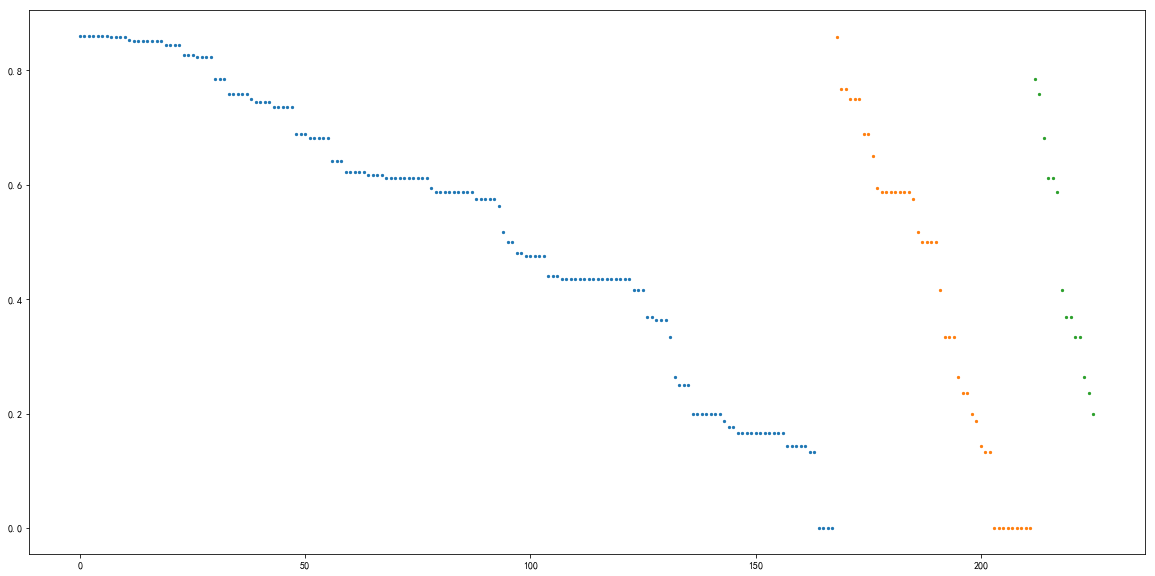

In [355]:
x = data18[data18['importance']=='X']
y = data18[data18['importance']=='Y']
z = data18[data18['importance']=='Z']
plt.figure(figsize=(20,10))
plt.scatter(np.arange(x.shape[0]),x['repeating_rate'], s=5)
plt.scatter(np.arange(x.shape[0],x.shape[0]+y.shape[0]),y['repeating_rate'], s=5)
plt.scatter(np.arange(x.shape[0]+y.shape[0],x.shape[0]+y.shape[0]+z.shape[0]),z['repeating_rate'], s=5)
plt.show()

### 如何绘图？

## 技能点资源频次

- 如果“资源”是试卷加作业，作业部分每个技能点对应一个，不用再分析了

In [5]:
data19 = sql.read_sql("select count(*) as paper_number, skill_point_id, skill_point_name from (SELECT user_id, skill_point_id, skill_point_name, paper_id FROM self_test_logs, valid_students where valid_students.uid=self_test_logs.user_id) A group by skill_point_id,skill_point_name order by paper_number desc", conn)

In [6]:
data19.head()

,paper_number,skill_point_id,skill_point_name
0,134,10662,定时函数（setTimeout()、setInterval()）
1,130,16103,document对象
2,119,170,了解网页的基本结构
3,119,13543,了解html标记特点及发展历史
4,119,13542,了解html基本概念


Text(0,0.5,'number of papers per skill point')

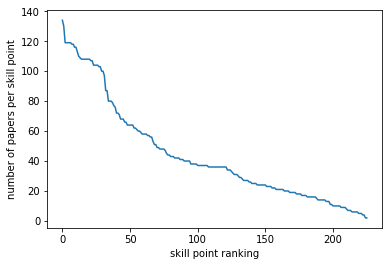

In [69]:
data19['paper_number'].plot()
plt.xlabel("skill point ranking")
plt.ylabel("number of papers per skill point")

In [8]:
data19['paper_number'].describe()

count    226.000000
mean      44.154867
std       33.081017
min        2.000000
25%       19.000000
50%       36.000000
75%       60.000000
max      134.000000
Name: paper_number, dtype: float64

- 参考四分位数，试卷数大于60为使用资源多，35-60位使用资源中等，35以下为少

In [27]:
data19['tag']='nan'
data19.head()

,paper_number,skill_point_id,skill_point_name,tag
0,134,10662,定时函数（setTimeout()、setInterval()）,nan
1,130,16103,document对象,nan
2,119,170,了解网页的基本结构,nan
3,119,13543,了解html标记特点及发展历史,nan
4,119,13542,了解html基本概念,nan


In [28]:
data19.index

RangeIndex(start=0, stop=226, step=1)

In [48]:
for ei in data19.index:
    if data19.loc[ei,'paper_number'] > 60:
        data19['tag']='high'
    else:
        data19['tag']='nan'
    #if data19.loc[ei,'paper_number']<=60 and data19.loc[ei,'paper_number']>35:
     #   data19['tag']='medium'
    #if data19.loc[ei,'paper_number']<=35:
     #   data19['tag']='low'

In [49]:
for ei in data19.index:
    print(data19.loc[ei, 'paper_number']>60)


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [61]:
data19.iloc[:56,-1]='high'

In [66]:
data19.iloc[56:122,-1]='medium'

In [67]:
data19.iloc[122:,-1]='low'

In [70]:
data19.head()

,paper_number,skill_point_id,skill_point_name,tag
0,134,10662,定时函数（setTimeout()、setInterval()）,high
1,130,16103,document对象,high
2,119,170,了解网页的基本结构,high
3,119,13543,了解html标记特点及发展历史,high
4,119,13542,了解html基本概念,high


Text(0,0.5,'number of papers per skill point')

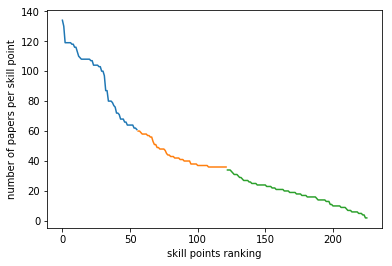

In [75]:
data19[data19['tag']=='high']['paper_number'].plot()
data19[data19['tag']=='medium']['paper_number'].plot()
data19[data19['tag']=='low']['paper_number'].plot()
plt.xlabel("skill points ranking")
plt.ylabel("number of papers per skill point")

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

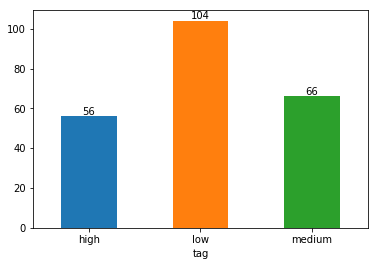

In [85]:
data19['paper_number'].groupby(data19['tag']).count().plot(kind='bar')
x = np.arange(3)
y = data19['paper_number'].groupby(data19['tag']).count()
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va='bottom')
plt.xticks(rotation=0)